Este archivo contiene datos sobre las emisiones de dióxido de carbono de los estados de EE. UU. desde 1970  hasta el año 2021(último estudio realizado) , desglosados ​​por estado, sector (residencial, comercial, transporte, energía eléctrica e industrial) y tipo de combustible 
(carbón, petróleo, gas natural y todos los combustibles combinados).
FUENTE DE DATOS DE:("Dataset de Kaggle sobre emisiones de co2 por pais y año, con ajustes por población")

Importación de librerias a utilizar

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import missingno as msno 


Ignorar mensajes de advertencias.

In [2]:
warnings.filterwarnings('ignore')

Se procede a la ingesta y lectura del archivo emssions.csv

In [3]:
file_path = r'C:\Users\walter\Desktop\Proyecto-NYC-Taxis\Data\Data Procesada\emissions.csv'


try:
    df_emissions = pd.read_csv(file_path)
    print(df_emissions)
except FileNotFoundError:
    print("El archivo no se encontró en la ruta especificada.")
except pd.errors.ParserError:
    print("Error al parsear el archivo CSV.")
except Exception as e:
    print(f"Se produjo un error al abrir el archivo: {e}")

       year state-name                                      sector-name  \
0      1970    Alabama              Industrial carbon dioxide emissions   
1      1970    Alabama              Industrial carbon dioxide emissions   
2      1970    Alabama              Industrial carbon dioxide emissions   
3      1970    Alabama              Industrial carbon dioxide emissions   
4      1970    Alabama  Total carbon dioxide emissions from all sectors   
...     ...        ...                                              ...   
59896  2021    Wyoming              Commercial carbon dioxide emissions   
59897  2021    Wyoming             Residential carbon dioxide emissions   
59898  2021    Wyoming             Residential carbon dioxide emissions   
59899  2021    Wyoming             Residential carbon dioxide emissions   
59900  2021    Wyoming  Total carbon dioxide emissions from all sectors   

         fuel-name       value  
0             Coal   26.721507  
1        Petroleum    3.577779  


Vista preliminar de primeras y ultimas filas

In [4]:
print(df_emissions.head())
print(df_emissions.tail())

   year state-name                                      sector-name  \
0  1970    Alabama              Industrial carbon dioxide emissions   
1  1970    Alabama              Industrial carbon dioxide emissions   
2  1970    Alabama              Industrial carbon dioxide emissions   
3  1970    Alabama              Industrial carbon dioxide emissions   
4  1970    Alabama  Total carbon dioxide emissions from all sectors   

     fuel-name       value  
0         Coal   26.721507  
1    Petroleum    3.577779  
2  Natural Gas    8.944097  
3    All Fuels   39.243383  
4    All Fuels  102.646851  
       year state-name                                      sector-name  \
59896  2021    Wyoming              Commercial carbon dioxide emissions   
59897  2021    Wyoming             Residential carbon dioxide emissions   
59898  2021    Wyoming             Residential carbon dioxide emissions   
59899  2021    Wyoming             Residential carbon dioxide emissions   
59900  2021    Wyoming  

Cantidad de filas y columnas con sus respectivos nombres y expecíficaciones en variables cualitativas y cuantitativas 

In [5]:
# Cantidad de filas y columnas
num_filas, num_columnas = df_emissions.shape

# Nombres de las columnas
columnas = df_emissions.columns

# Determinar si cada columna es cuantitativa o cualitativa
tipos_cuantitativos = df_emissions.select_dtypes(include=['number']).columns
tipos_cualitativos = df_emissions.select_dtypes(exclude=['number']).columns

# Resultados
print(f"Cantidad de filas: {num_filas}")
print(f"Cantidad de columnas: {num_columnas}")
print("\nNombres de las columnas y tipos de variables:")
for columna in columnas:
    tipo = "Cuantitativa" if columna in tipos_cuantitativos else "Cualitativa"
    print(f"{columna}: {tipo}")

Cantidad de filas: 59901
Cantidad de columnas: 5

Nombres de las columnas y tipos de variables:
year: Cuantitativa
state-name: Cualitativa
sector-name: Cualitativa
fuel-name: Cualitativa
value: Cuantitativa


Información de las columnas para verificar nulos

In [6]:
df_emissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59901 entries, 0 to 59900
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         59901 non-null  int64  
 1   state-name   59901 non-null  object 
 2   sector-name  59901 non-null  object 
 3   fuel-name    59901 non-null  object 
 4   value        59901 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.3+ MB


Estadística descriptiva

In [7]:
df_emissions.describe()

,year,value
count,59901.000000,59901.000000
mean,1995.101067,35.647050
std,14.922049,207.883289
min,1970.000000,0.000022
25%,1982.000000,0.793179
50%,1995.000000,4.197628
75%,2008.000000,19.413459
max,2021.000000,5996.429314


Verificación de duplicados

In [8]:
df_emissions.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
59896    False
59897    False
59898    False
59899    False
59900    False
Length: 59901, dtype: bool

Búsqueda de valores nulos

In [20]:
print("Datos nulos:")
print(df_emissions.isnull().sum())

Datos nulos:
year           0
state-name     0
sector-name    0
fuel-name      0
value          0
dtype: int64


Filtrar las columnas year y value para crear la matriz de correlación de los ultimos 5 años

In [57]:
# Filtrar los datos de 2017 a 2020
filtered_data = df_emissions[(df_emissions['year'] >= 2017) & (df_emissions['year'] <= 2021)]


# Seleccionar solo la columna 'value'
filtered_data_values = filtered_data[['year', 'value']]

# Mostrar los datos filtrados
print("Datos filtrados para los años 2017 a 2021:")
print(filtered_data_values.head())

# Verificar el rango de valores en la columna 'year' después del filtrado
print("Rango de valores en 'year' después del filtrado:")
print(filtered_data_values['year'].min(), filtered_data_values['year'].max())



Datos filtrados para los años 2017 a 2021:
       year      value
54481  2017  35.554522
54482  2017   1.432644
54483  2017   1.738412
54484  2017   0.862858
54485  2017   1.246454
Rango de valores en 'year' después del filtrado:
2017 2021



Verificación de valores unico en las columnas year/value para ver la correlación d ambas para visualizar los ultimos 5 años.

In [58]:
# Valores únicos en la columna 'value'
print("Valores únicos en 'value':")
print(filtered_data_values['value'].unique())

Valores únicos en 'value':
[35.554522  1.432644  1.738412 ...  0.717777  0.220212 10.198574]


Matriz de correlación y su representación gráfica

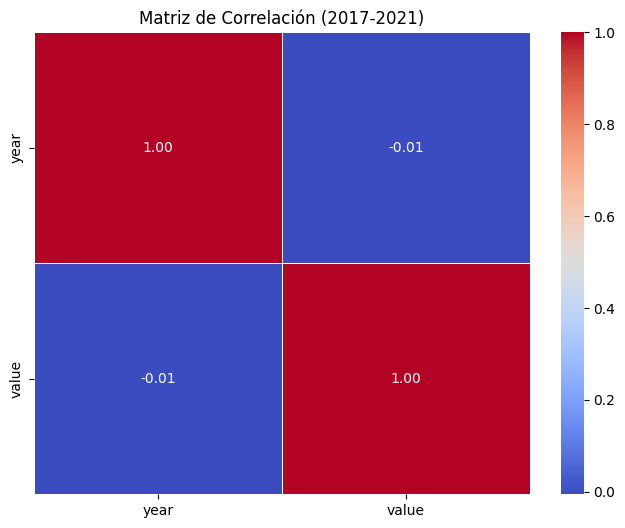

In [59]:
# Calcular la matriz de correlación
correlation_matrix = filtered_data_values.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación (2017-2021)')
plt.show()

Visualizar en gráfico de dispersión de los ultimos 5 años

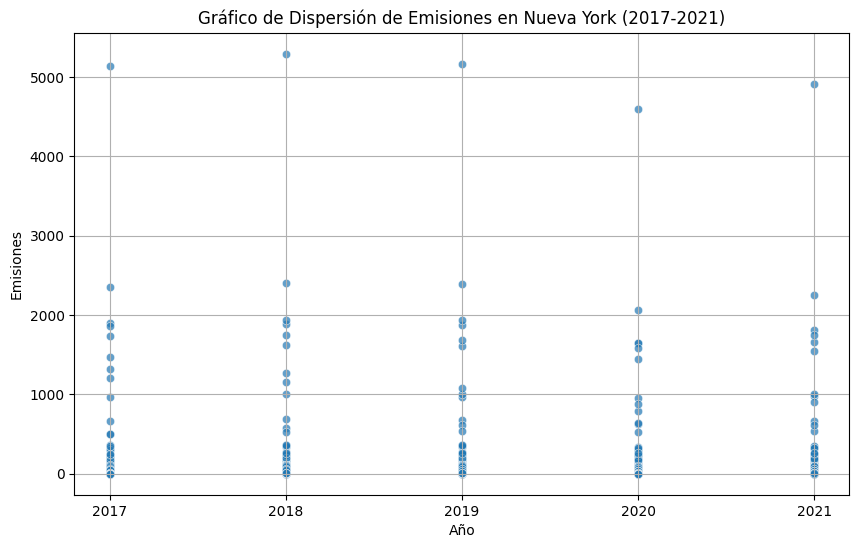

In [61]:
# Crear gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_data_values, x='year', y='value', alpha=0.7)
plt.title('Gráfico de Dispersión de Emisiones en Nueva York (2017-2021)')
plt.xlabel('Año')
plt.ylabel('Emisiones')
plt.grid(True)
plt.xticks([2017, 2018, 2019, 2020,2021])  
plt.show()

Identificación en gráfico de curvas

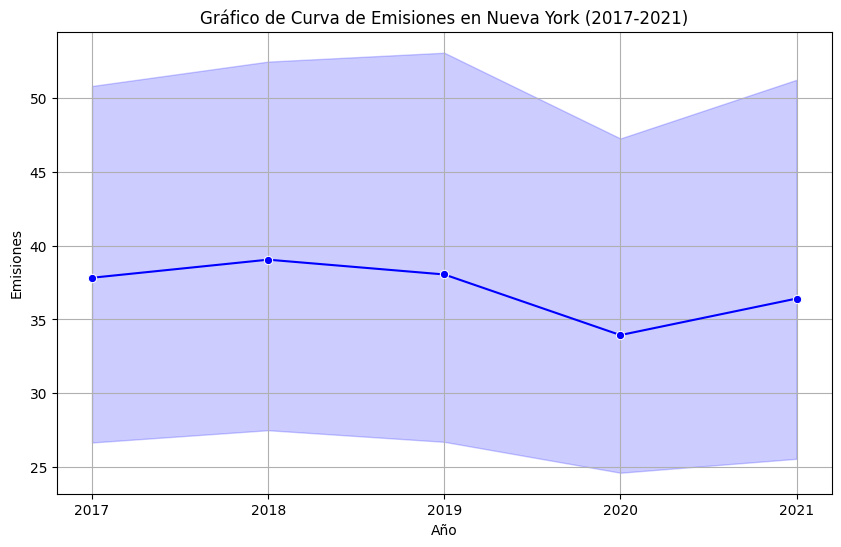

In [62]:

# Crear gráfico de curva
plt.figure(figsize=(10, 6))
sns.lineplot(data=filtered_data_values, x='year', y='value', marker='o', linestyle='-', color='b')
plt.title('Gráfico de Curva de Emisiones en Nueva York (2017-2021)')
plt.xlabel('Año')
plt.ylabel('Emisiones')
plt.grid(True)
plt.xticks([2017, 2018, 2019, 2020,2021])  
plt.show()

Identificar el combustible emitido por estado.

In [63]:
# Agrupar los datos por estado y nombre del combustible, sumando los valores
grouped_data = df_emissions.groupby(['state-name', 'fuel-name'])['value'].sum().reset_index()

# Mostrar los primeros registros para ver la estructura de los datos
print(grouped_data.head())



  state-name    fuel-name         value
0    Alabama    All Fuels  12259.485416
1    Alabama         Coal   6602.512365
2    Alabama  Natural Gas   2118.203788
3    Alabama    Petroleum   3538.769275
4     Alaska    All Fuels   3305.207946


Visualización con Bar Plot con Diferenciación por Categorización

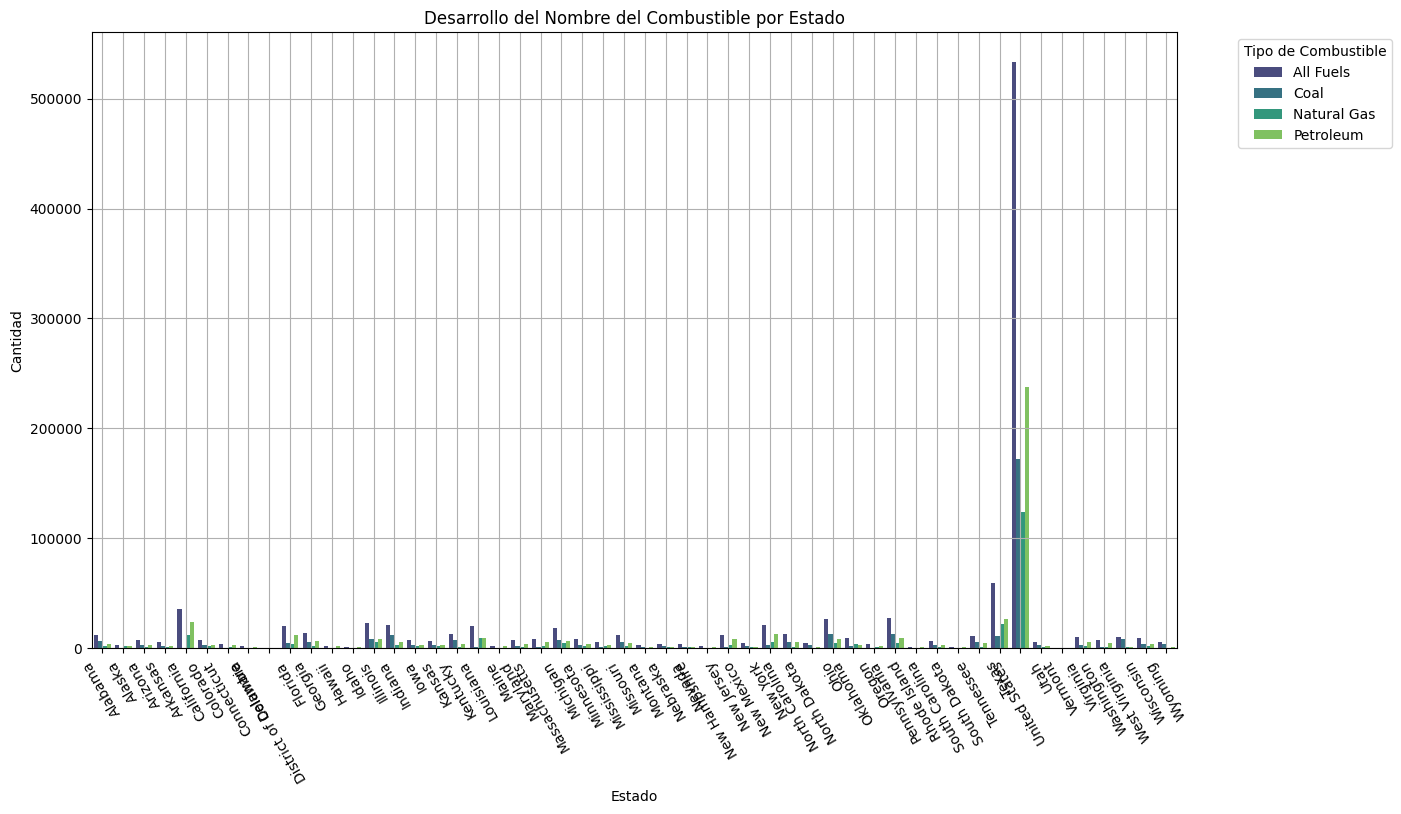

In [65]:
# Crear una visualización de la cantidad de cada combustible por estado
plt.figure(figsize=(14, 8))
sns.barplot(data=grouped_data, x='state-name', y='value', hue='fuel-name', palette='viridis')
plt.title('Desarrollo del Nombre del Combustible por Estado')
plt.xlabel('Estado')
plt.ylabel('Cantidad')
plt.xticks(rotation=120)  
plt.legend(title='Tipo de Combustible', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

Se genera una nueva columna con el ingreso de los datos recopilados y se concatena para guardar en csv

In [72]:
# Agregar una columna que indique el origen de los datos
filtered_data_values['source'] = 'Filtered Data (2017-2020)'
grouped_data['source'] = 'Grouped Data by State and Fuel'

# Concatenar los DataFrames
combined_data_CO2 = pd.concat([filtered_data_values, grouped_data], ignore_index=True)


In [73]:
# Guardar el DataFrame combinado en un archivo CSV
combined_data_CO2.to_csv('combined_data_CO2.csv', index=False)

Conclusión:Este análisis proporciona una base sólida para comprender la evolución de las emisiones y el uso de combustibles en los últimos años, facilitando la toma de decisiones,luego se dispne en un archivo csv.